## Task A: Bisection Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    
    return 25 - ((6*np.pi*(x**2)) - (np.pi*(x**3)))/3

In [3]:
#modified function for Maths sheet 17 - Q1

def mybisection(a, b, e):
    
    x01 = a
    x02 = b
    
    x = np.linspace(a-3,b+3,int(abs((a-b)*100)))
    y = func(x)
    
    plt.figure(figsize=(15,10))
    plt.plot(x,y)
    plt.axhline(y=0, c='b')
    
    error = e*2
    
    i = 1
    
    while error > e:
        
        i += 1
        
        plt.plot([a,a],[0,func(a)])
        plt.plot([b,b],[0,func(b)])
        
        mid = (a+b)/2
        
        #relative_error = ((b-a)/(2**(i+1)))
        #print('Relative error: {}'.format(relative_error))
        print(np.sign(func(a)) * np.sign(func(b)))
        print(('a: {}, y: {}'.format(a,func(a))))
        print(('b: {}, y: {}'.format(b,func(b))))
        print('mid: {}'.format(mid))
        print('')
        
        error = abs(a - mid)

        if np.sign(func(a)) * np.sign(func(mid)) <= 0:
            
            
            #if sign changes between a and midpoint then solution lies in the middle of
            #a and midpoint of a and b so make midpoint the endpoint i.e. b 

            b = mid

        else:

            a = mid
            
            
        
    plt.show()
    
    return 'The midpoint with {} iterations is: {}'.format(i,(a+b)/2)

-1.0
a: 0, y: 25.0
b: 4, y: -8.510321638291124
mid: 2.0

-1.0
a: 2.0, y: 8.244839180854438
b: 4, y: -8.510321638291124
mid: 3.0

-1.0
a: 2.0, y: 8.244839180854438
b: 3.0, y: -3.274333882308138
mid: 2.5

-1.0
a: 2.5, y: 2.0925535675744236
b: 3.0, y: -3.274333882308138
mid: 2.75

-1.0
a: 2.5, y: 2.0925535675744236
b: 2.75, y: -0.7381523130038836
mid: 2.625

-1.0
a: 2.625, y: 0.6465210115275646
b: 2.75, y: -0.7381523130038836
mid: 2.6875

-1.0
a: 2.625, y: 0.6465210115275646
b: 2.6875, y: -0.05425254507153454
mid: 2.65625

-1.0
a: 2.65625, y: 0.2941208834439131
b: 2.6875, y: -0.05425254507153454
mid: 2.671875

-1.0
a: 2.671875, y: 0.11941884751526288
b: 2.6875, y: -0.05425254507153454
mid: 2.6796875

-1.0
a: 2.6796875, y: 0.03245282277601902
b: 2.6875, y: -0.05425254507153454
mid: 2.68359375

-1.0
a: 2.6796875, y: 0.03245282277601902
b: 2.68359375, y: -0.01093263051272686
mid: 2.681640625

-1.0
a: 2.681640625, y: 0.010751927197091504
b: 2.68359375, y: -0.01093263051272686
mid: 2.682617187

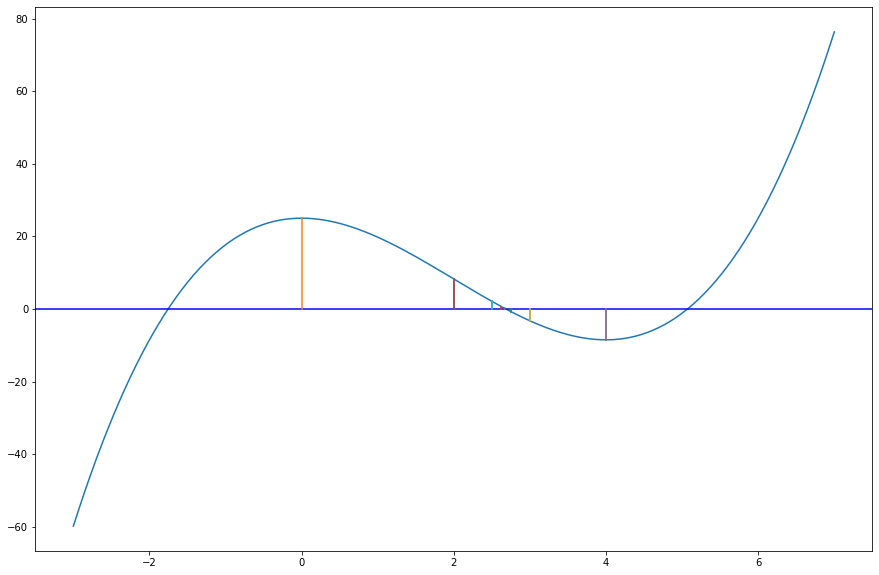

The midpoint with 13 iterations is: 2.68212890625


In [4]:
sol = mybisection(0,4,0.001)
print(sol)

## Task B: Bisection Method with Discrete Function

In [5]:
def Lagrangian(j, xp, xn):
    
    L = 1
    n = len(xn)
    
    for k in range(n):
        if k != j:
            L *= (xp-xn[k])/(xn[j]-xn[k])
    
    return L

#xn and yn represent the nodes we know 
#x represents the points we are trying to interpolate for
def LagrInterp(xn,yn,x):
    
    y = []
    
    n = len(yn)

    for i in range(len(x)):
        
        p = 0
        
        for j in range(n):
        
            p += Lagrangian(j, x[i], xn) * yn[j]
            
        y += [p]
            
        
        
    return y    



def mybisection_discrete(filex, filey):
    
    #input code to read in xn and yn
    xn = [float(point.strip()) for point in open(filex, 'r').readlines()]
    yn = [float(point.strip()) for point in open(filey, 'r').readlines()]
    
    a = min(xn)
    b = max(xn)
    
    plt.figure(figsize=(15,10))
    plt.scatter(xn,yn)
    
    for _ in range(3):
        
        interpa = LagrInterp(xn,yn,[a])
        interpb = LagrInterp(xn,yn,[b])
        
        
        plt.plot([a,a],[0,interpa[0]])
        plt.plot([b,b],[0,interpb[0]])
        
        mid = (a+b)/2
        
        print(('a: {}, y: {}'.format(a,interpa[0])))
        print(('b: {}, y: {}'.format(b,interpb[0])))
        print('mid: {}'.format(mid))
        print('')

        if np.sign(interpa) * np.sign(LagrInterp(xn,yn,[mid])) <= 0:
            
            
            #if sign changes between a and midpoint then solution lies in the middle of
            #a and midpoint of a and b so make midpoint the endpoint

            b = mid

        else:

            a = mid
            
    
    return 'The root is approximated to be at {}'.format((a+b)/2)

a: -10.0, y: -1632.0
b: 10.0, y: 608.0
mid: 0.0

a: 0.0, y: -12.0
b: 10.0, y: 608.0
mid: 5.0

a: 0.0, y: -12.0
b: 5.0, y: 48.0
mid: 2.5



'The root is approximated to be at 1.25'

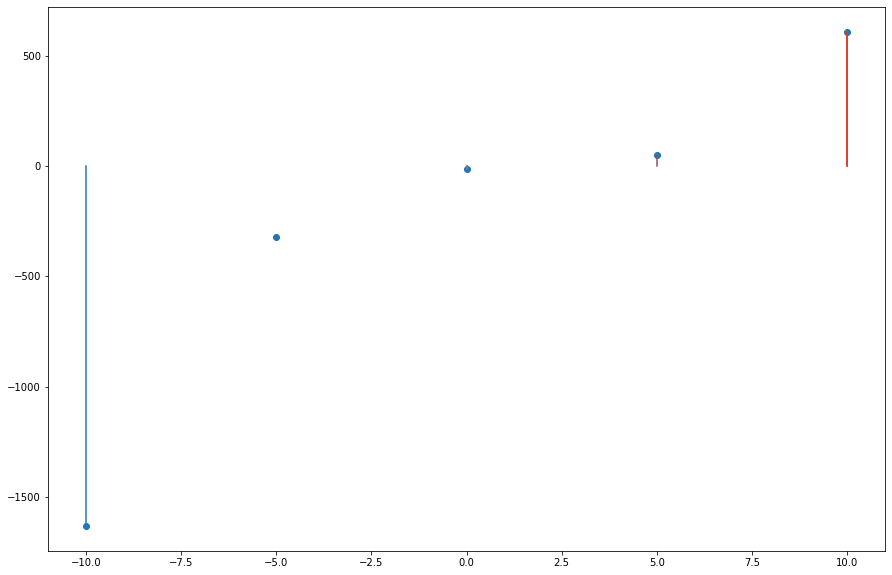

In [6]:
mybisection_discrete("x.txt", 'fx.txt')

## Task C: Newton Raphson Method

In [7]:
#note that for this function, f(x) and f'(x) have to be pre-programmed
def f(x):
    
    #return 25 - ((6*np.pi*(x**2)) - (np.pi*(x**3)))/3
    
    return (x**3) - (2*(x**2)) - (4*x) + 8

""""def f(x):
    
    return (x**2) + ((x-2)**3) - 4"""

def f_prime(x, dx):
    
    return (f(x+dx)-f(x))/dx

def myNewton(x0, dx, e):
    
    #create an artificial error to start the loop
    error = 10*e
    xn = x0
    
    x = np.linspace(x0-10,x0+20,int((x0+10)*10))
    y = f(x)
    
    #plot f(x) against f(x)
    plt.figure(figsize=(15,10))
    plt.plot(x, y,'g')
    
    #draw x axis
    plt.axhline(0, color='black')
    
    i = 0
    
    while error > e:
        
        i += 1
        #need to store previous x coordinate
        xp = xn
        
        if f_prime(xn,dx)== 0:
            
            return xn
        
        else:
            
            xn = xp - (f(xp)/f_prime(xp,dx))
            
            #visualise what Newton Raphson is doing
            plt.plot([xp,xn],[f(xp), 0],'r')
            plt.plot([xp,xp], [0, f(xp)], 'b--')
        
        #error is difference between new and old x
        error = abs((xn-xp)/xp)
    
    plt.show()
    
    return 'The Newton Raphson approximates the following as the root of the function: {} after {} iterations'.format(xn, i)
    
    

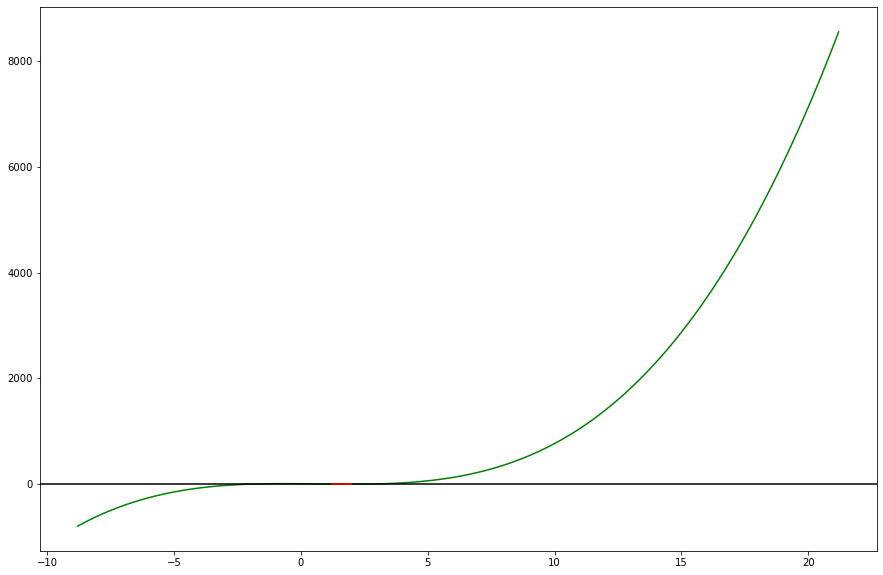

'The Newton Raphson approximates the following as the root of the function: 1.9679117335349354 after 4 iterations'

In [8]:
x0 = 1.2
myNewton(x0,0.1,0.05)

## Task D: Newton-Raphson Method for Systems of Non-Linear Equations

In [9]:
#using functions in Maths Lecture Slides

def u(x,y):
    
    #return (x**2) + 1 - y
    return (x**2)+(y**2) - 16

def v(x,y):
    
    #return (2*np.cos(x)) - y
    return ((x-4)**2) + ((y-4)**2) - 8

#can apply both of the below functions to u and v

def f_prime_x_u(x,y,dx):
    
    return (u(x+dx,y) - u(x,y))/dx

def f_prime_y_u(x,y,dy):
    
    return (u(x,y+dy) - u(x,y))/dy

def f_prime_x_v(x,y,dx):
    
    return (v(x+dx,y) - v(x,y))/dx

def f_prime_y_v(x,y,dy):
    
    return (v(x,y+dy) - v(x,y))/dy
    
    
def Newton_System(x0,y0, dx,dy,e):
    
    xn = np.array([[x0], [y0]])
    
    error = 10*e
    
    while error > e:
        
        xp = np.array([[xn[0][0]], [xn[1][0]]])
        
        fn = np.array([[u(xp[0][0], xp[1][0])], [v(xp[0][0], xp[1][0])]])
        
        jacobian = np.array([[f_prime_x_u(xp[0][0],xp[1][0],dx), f_prime_y_u(xp[0][0],xp[1][0],dy)],
                            [f_prime_x_v(xp[0][0],xp[1][0],dx), f_prime_y_v(xp[0][0],xp[1][0],dy)]])
        
        j_inverse = np.linalg.inv(jacobian)
        xn = xp - np.matmul(j_inverse, fn)
        
        #error is difference between new and old x
        error = max(np.abs(xn - xp))
        
    return 'The Newton Raphson approximates the following as the root of the function: x: {}, y: {}'.format(xn[0][0],
                                                                                                           xn[1][0])

In [10]:
e = 0.0001

# set the initial guess
x0 = 4
y0 = 1

dx = 0.05*e
dy = 0.05*e

Newton_System(x0,y0, dx,dy,e)

'The Newton Raphson approximates the following as the root of the function: x: 3.8228756561679766, y: 1.177124343832018'

## Secant Method

In [11]:
def f(x):
    
    return 25 - ((6*np.pi*(x**2)) - (np.pi*(x**3)))/3

def f_prime(x, dx):
    
    return (f(x+dx)-f(x))/dx

def secant(x0,x1, e):
    
    dx = 0.1
    error = 10*e
    
    i = 0
    while error > e:
        
        i += 1
        
        xn1 = x1 - (f(x1)*(x0- x1))/(f(x0)-f(x1))

        error = abs((xn1 - x1)/x1)
        print(xn1)
        
        x0 = x1
        #calculated position becomes other point
        x1 = xn1

        
    print(i)
        
    return xn1

In [12]:
x0 = 2
x1 = 1.99*2
secant(x0,x1,0.01)

2.9744593128105734
2.417801955906967
2.6979263057666225
2.6832691820403243
4


2.6832691820403243

## Newton Raphson with Multiplier

In [13]:
#note that for this function, f(x) and f'(x) have to be pre-programmed
def f(x):
    
    #return 25 - ((6*np.pi*(x**2)) - (np.pi*(x**3)))/3
    
    return (x**3) - (2*(x**2)) - (4*x) + 8

""""def f(x):
    
    return (x**2) + ((x-2)**3) - 4"""

def f_prime(x, dx):
    
    return (f(x+dx)-f(x))/dx

def myNewton(x0, dx, m, e):
    
    #create an artificial error to start the loop
    error = 10*e
    xn = x0
    
    x = np.linspace(x0-10,x0+20,int((x0+10)*10))
    y = f(x)
    
    #plot f(x) against f(x)
    plt.figure(figsize=(15,10))
    plt.plot(x, y,'g')
    
    #draw x axis
    plt.axhline(0, color='black')
    
    i = 0
    
    while error > e:
        
        i += 1
        #need to store previous x coordinate
        xp = xn
        
        if f_prime(xn,dx)== 0:
            
            return xn
        
        else:
            
            xn = xp - (m*(f(xp)/f_prime(xp,dx)))
            
            #visualise what Newton Raphson is doing
            plt.plot([xp,xn],[f(xp), 0],'r')
            plt.plot([xp,xp], [0, f(xp)], 'b--')
        
        #error is difference between new and old x
        error = abs((xn-xp)/xp)
    
    plt.show()
    
    return 'The Newton Raphson approximates the following as the root of the function: {} after {} iterations'.format(xn, i)
    
    

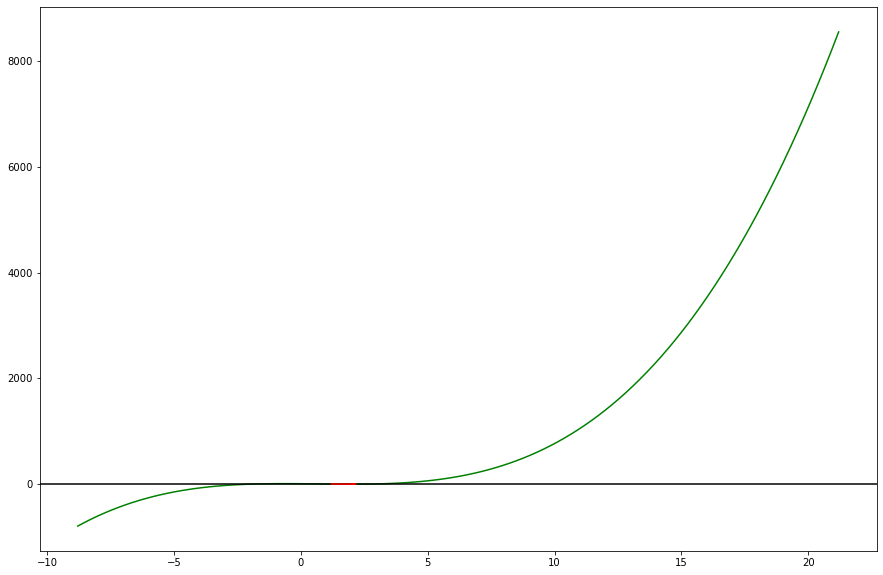

'The Newton Raphson approximates the following as the root of the function: 2.008297918117087 after 7 iterations'

In [15]:
x0 = 1.2
m = 2
e = 0.001
myNewton(x0,0.1, m, e)